# Croq'Pain
## Yellow Group 2 - Aman, Gabriel Andaya, Menji Wei, Nivan Vora

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_1samp
from scipy.stats import norm
import pyrsm as rsm
import seaborn as sns

### Fixing the Data

In [2]:
# Load data
df = pd.read_parquet("CroqPain.parquet")
df.head()


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,


In [3]:
df.to_csv("Original_CroqPain.csv", index=False)

In [4]:
df.describe()


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
count,70.000000,60.000000,70.000000,70.000000,60.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.500000,614.812261,832.969006,121.257143,10.75000,17.403714,2.836857,2.612429,3.360714,3.389100,4.082286,31.211429,3.271429,5.957143,29.385714,16.557143,128.071429
std,20.351085,3641.044163,254.008030,54.264966,3.56834,6.321692,1.248883,1.224226,1.747099,1.614032,1.458006,3.510008,2.558993,3.394094,22.016656,6.072546,8.033122
min,1.000000,-42.979570,504.273400,52.000000,4.00000,3.500000,0.260000,0.060000,0.250000,0.580000,0.910000,23.000000,0.000000,0.000000,5.000000,7.600000,110.000000
25%,18.250000,76.978270,652.580500,84.250000,8.00000,12.282500,1.885000,1.780000,2.132500,2.000000,2.970000,28.625000,1.000000,3.000000,12.250000,12.350000,122.000000
50%,35.500000,140.702808,753.745900,98.000000,11.00000,17.310000,2.800000,2.505000,3.285000,3.565000,4.050000,30.150000,2.000000,5.000000,23.000000,14.200000,129.000000
75%,52.750000,214.354711,907.042450,148.250000,14.00000,22.502500,3.942500,3.515000,4.982500,4.867500,5.270000,33.975000,4.750000,8.000000,42.500000,19.875000,134.000000
max,70.000000,28339.672620,1719.523600,285.000000,17.00000,30.020000,5.150000,5.540000,6.280000,5.990000,6.720000,38.800000,12.000000,14.000000,96.000000,33.400000,142.000000


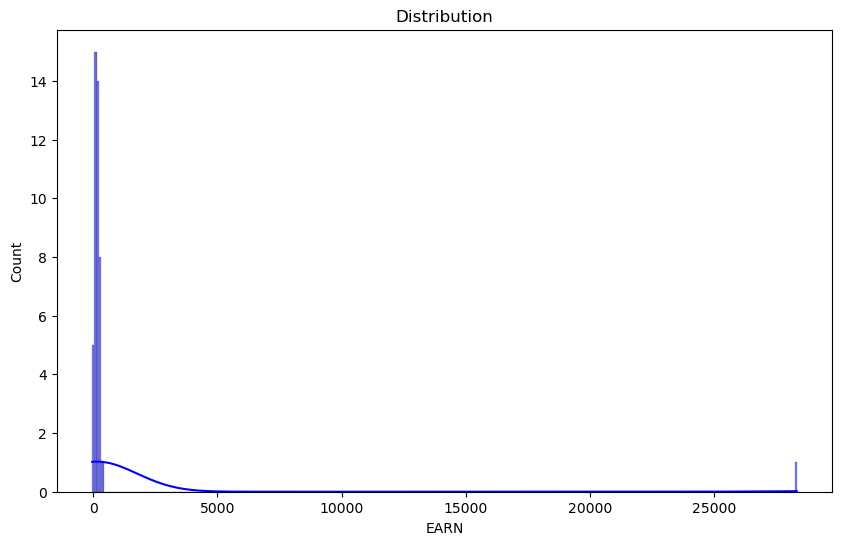

In [5]:
#Looking for abnormality

plt.figure(figsize=(10, 6))
sns.histplot(df["EARN"], kde=True, color="blue")
plt.title("Distribution")
plt.show()

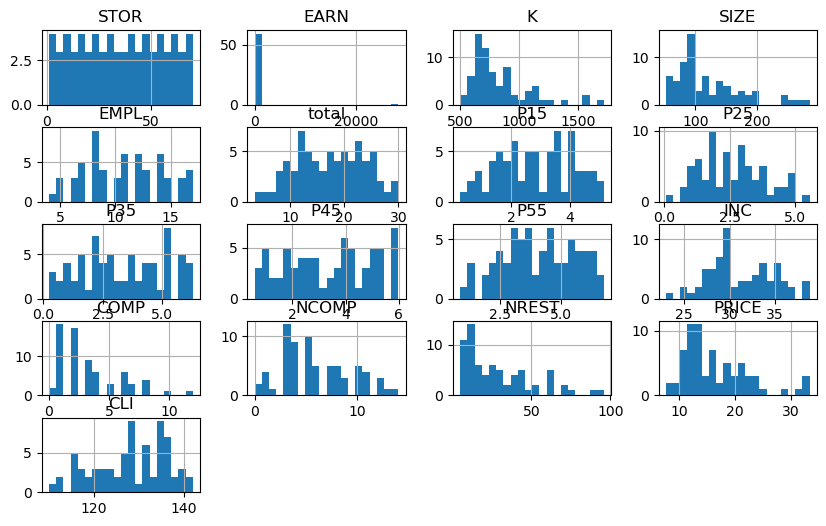

In [6]:
hist = df.hist(bins=20, figsize=(10, 6))
plt.show()

In [7]:
#replace outlier with median of the dataset

old_value = 28339.672620
new_value = 28.3

df['EARN'] = df['EARN'].replace(old_value, new_value)

print(df['EARN'].head())

0     28.300000
1     -1.455001
2     68.932678
3    202.073327
4    115.778511
Name: EARN, dtype: float64


In [8]:
#fixed data

CroqPainFix = df
CroqPainFix

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28.300000,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier


The anomaly in the data occurred with the 'EARN' value for the first store, which was recorded as 28339.672620. This value has been identified as an outlier and could significantly affect our statistical analysis, potentially skewing the results of any hypothesis tests. Since the 'EARN' values are expressed in thousands, and considering that this list was compiled by Michel's team for a model to select store locations, it is likely that there was a data entry error. Specifically, the value may have been mistakenly entered as 28339.672620 instead of the correct value of 28.3, consistent with the scale used for the other entries. It's possible that during the data collection, recording, or data entry, there was a unit or scale mix-up. If the values were supposed to represent earnings in thousands (i.e., 28.3 meaning 28.3 thousand), it's possible that the data was mistakenly recorded as 28,339.672620 instead of just 28.3.

In [9]:
CroqPainFix.to_csv("CroqPainFix.csv", index=False)

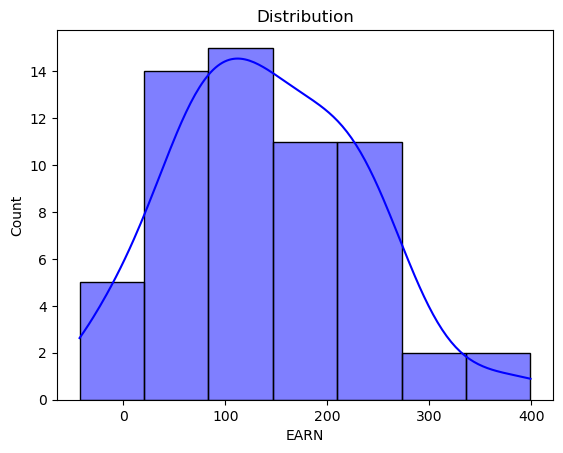

In [10]:
# Checking the distribution of the fixed data

sns.histplot(CroqPainFix['EARN'], kde=True, color="blue")
plt.title("Distribution")
plt.show()

### Part (a)

Visualize the data: examine histograms and scatterplots. Look at correlations between variables and try to identify sources of concern. Pay particular attention to the correlation for `total` and `P15` through `P55`. Do these correlations make sense to you?

Apply a transformation to the variables `EARN`, `P15`, `P25`, `P35`, `P45`, `P55`, `COMP`, `NCOMP`, and `NREST` where you normalize them by `total`. You can apply this normalization by defining new variables such as `EARN_total` which is equal to `EARN` divided by `total`.

Evaluate correlations and regressions with both the transformed and un-transformed data. Which do you prefer and why?

When you run regressions, be sure to use the `VIF` feature in Radiant for a more rigorous evaluation of multicollinearity. As you are building a model, it can also be useful to examine standardized coefficients. Also, conduct linear regression validation checks by using the `dashboard` plots in the `Plots` tab (see section 6.6 in the book).

If interested, you can experiment with the `Stepwise selection` option in the _Summary_ tab (i.e., click the checkbox) in the R version of Radiant (launched from RStudio). This is a feature in Radiant that uses a purely statistical approach to model building based on the Akaike Information Criterion (AIC). It will go through a series of steps and recommend a final model (see the bottom of the output). Compare the model selected using `Stepwise selection` to the model you arrived at yourself. Be critical and make a decision about the final model to recommend for Croq`Pain.

In [11]:
CroqPainFix.columns

Index(['STOR', 'EARN', 'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35',
       'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI', 'CITY'],
      dtype='object')

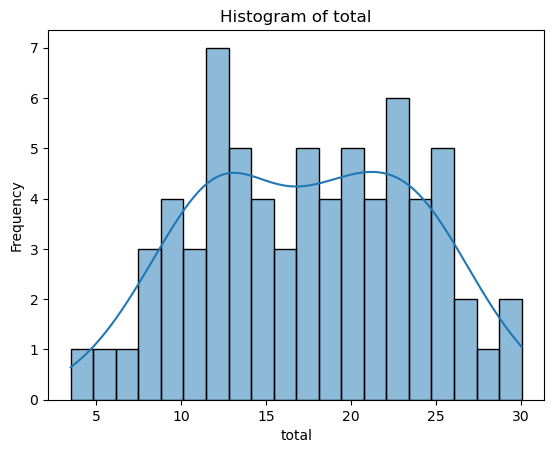

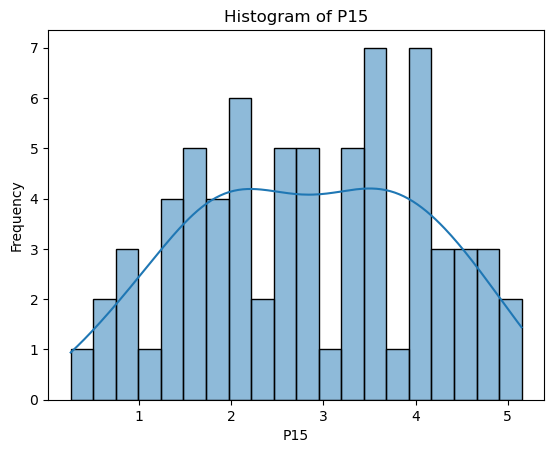

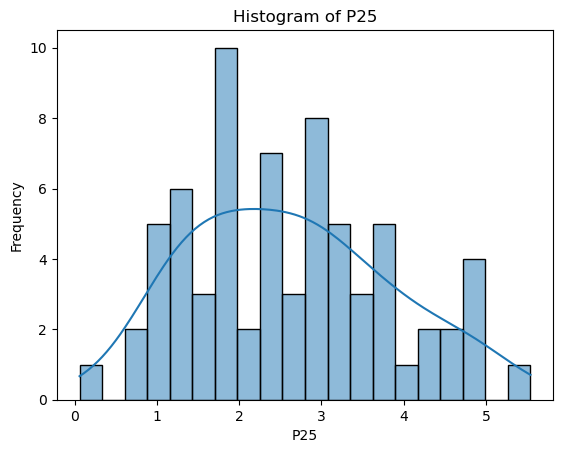

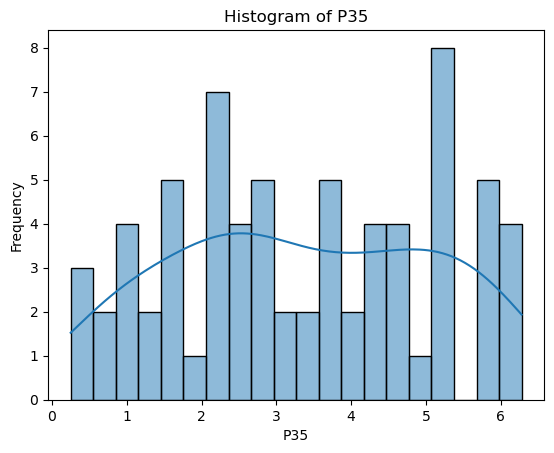

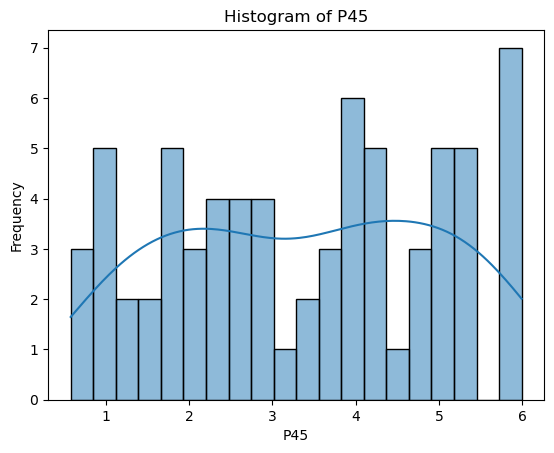

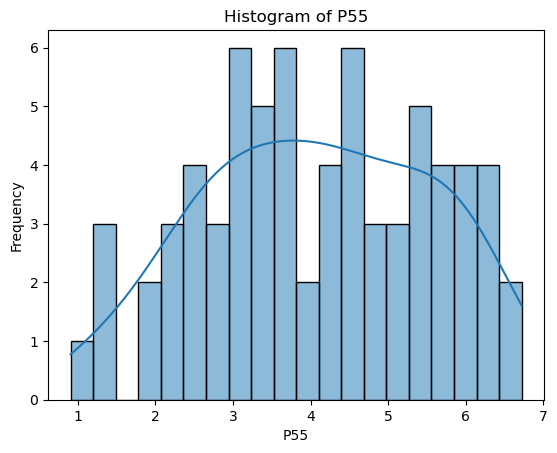

In [12]:
# Plotting histograms of the columns

columns_to_plot = ['total', 'P15', 'P25', 'P35', 'P45', 'P55']

for column in columns_to_plot:
    sns.histplot(data=CroqPainFix, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

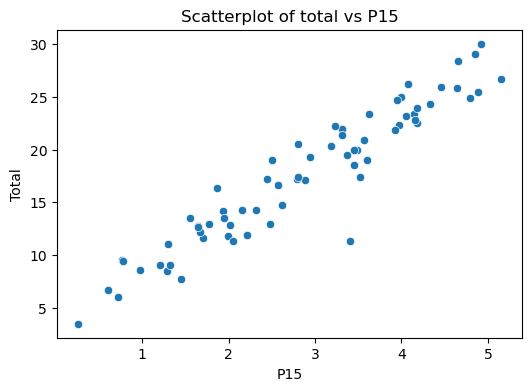

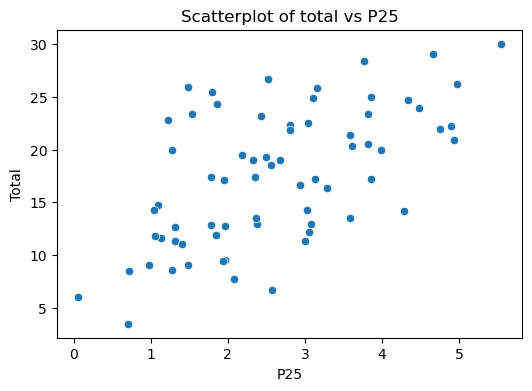

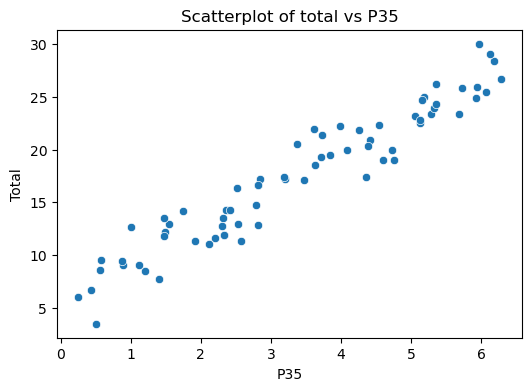

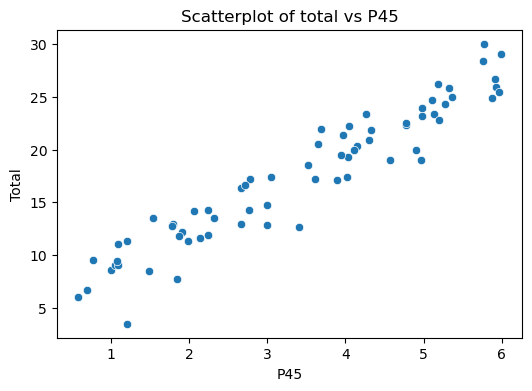

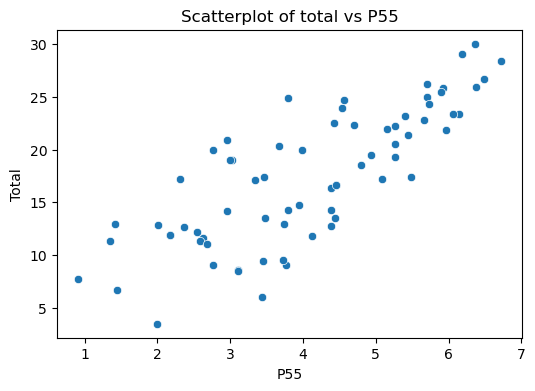

In [13]:
# Scatterplots of 'total' against P15-P55

for column in ['P15', 'P25', 'P35', 'P45', 'P55']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=CroqPainFix, x=column, y='total')
    plt.title(f'Scatterplot of total vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total')
    plt.show()

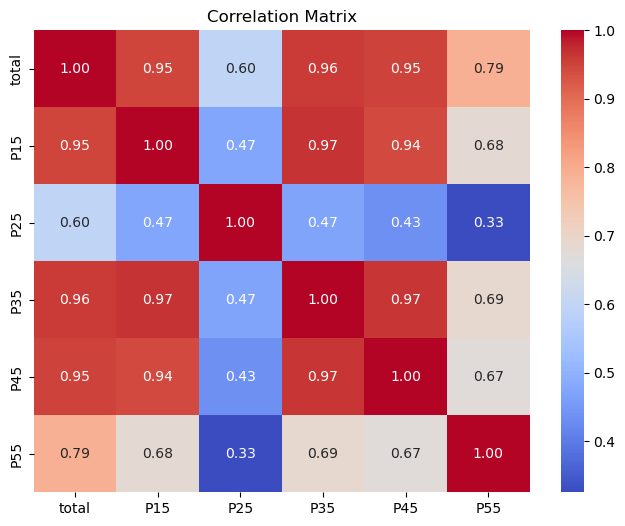

In [14]:
# Select the relevant columns
correlation_columns = ['total', 'P15', 'P25', 'P35', 'P45', 'P55']

# Compute the correlation matrix
correlation_matrix = CroqPainFix[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


With strong correlations being closer to 1 and weaker correlations being closer to 0, we can see a strong correlation of the total population to population ages of P15, P35, and P45, and weaker correlation to population ages P25 and P55.

In [15]:
# Transform ['EARN', 'P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']
# by normalizing it by dividing the columns by the total
variables_to_normalize = ['EARN', 'P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']

#Normalize
for var in variables_to_normalize:
    CroqPainFix[f'{var}_total'] = CroqPainFix[var] / CroqPainFix['total']

In [16]:
#Check new data columns
print(CroqPainFix[['EARN_total', 'P15_total', 'P25_total']])  # Check first few rows


    EARN_total  P15_total  P25_total
0     3.298368   0.114219   0.149184
1    -0.171986   0.152482   0.085106
2     3.580918   0.152727   0.129351
3     9.659337   0.170650   0.235660
4     9.929546   0.145798   0.097770
..         ...        ...        ...
65         NaN   0.129717   0.154088
66         NaN   0.154262   0.176471
67         NaN   0.082891   0.206164
68         NaN   0.131441   0.140904
69         NaN   0.130435   0.104348

[70 rows x 3 columns]


In [17]:
print(CroqPainFix[['EARN', 'total']].head())


         EARN  total
0   28.300000   8.58
1   -1.455001   8.46
2   68.932678  19.25
3  202.073327  20.92
4  115.778511  11.66


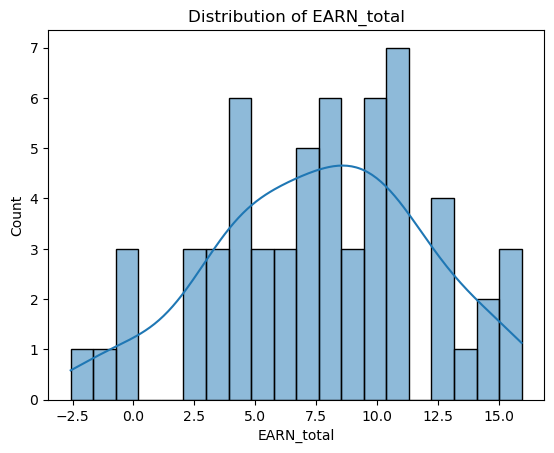

In [18]:
# Plot the distribution of the normalized EARN_total
sns.histplot(CroqPainFix['EARN_total'].dropna(), bins=20, kde=True)
plt.title('Distribution of EARN_total')
plt.show()

In [20]:
croqpainfix_transformed = CroqPainFix
croqpainfix_transformed.to_csv("croqpainfix_transformed.csv", index=False)

#### Evaluate correlations and regressions with both the transformed and un-transformed data. Which do you prefer and why?

In [21]:
# Define y_transformed by normalizing EARN by total
y_transformed = CroqPainFix['EARN'] / CroqPainFix['total']

# Check for missing values in y_transformed
print(y_transformed.isna().sum())  # check lost


10


In [22]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Define y_transformed from CELL INDEX: 25
X_transformed = CroqPainFix[['EARN_total', 'P15_total', 'P25_total', 'P35_total', 'P45_total', 'P55_total', 'COMP_total', 'NCOMP_total', 'NREST_total']]
X_transformed = sm.add_constant(X_transformed)

# Drop rows with missing or infinite values for transformed data
X_transformed = X_transformed.replace([np.inf, -np.inf], np.nan).dropna()
y_transformed = CroqPainFix['EARN'][X_transformed.index]

# Step 1: Clean the data and remove NaN values
print("Checking for missing values in y_transformed:")
print(y_transformed.isna().sum())

# Remove NaN values from y_transformed and align with X_transformed
X_transformed = X_transformed.loc[y_transformed.notna()]
y_transformed = y_transformed.dropna()

# Ensure there are no missing values in the untransformed data
X_untransformed = CroqPainFix[['P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']]
y_untransformed = CroqPainFix['EARN']
X_untransformed = X_untransformed.loc[y_untransformed.notna()]
y_untransformed = y_untransformed.dropna()



Checking for missing values in y_transformed:
0


In [ ]:
# Step 2: Calculate untransformed correlation matrices
print("\nCorrelation matrix for untransformed data:")
untransformed_corr = X_untransformed.corr()
print(untransformed_corr)


Correlation matrix for untransformed data:
            P15       P25       P35       P45       P55      COMP     NCOMP  \
P15    1.000000  0.424045  0.982010  0.980579  0.682103 -0.109473  0.073787   
P25    0.424045  1.000000  0.432174  0.414635  0.289147 -0.006784  0.101321   
P35    0.982010  0.432174  1.000000  0.987687  0.671819 -0.123760  0.068944   
P45    0.980579  0.414635  0.987687  1.000000  0.650377 -0.125267  0.082901   
P55    0.682103  0.289147  0.671819  0.650377  1.000000 -0.201812  0.006692   
COMP  -0.109473 -0.006784 -0.123760 -0.125267 -0.201812  1.000000  0.159834   
NCOMP  0.073787  0.101321  0.068944  0.082901  0.006692  0.159834  1.000000   
NREST  0.067913  0.005373  0.102332  0.094819 -0.022994  0.105719  0.005969   

          NREST  
P15    0.067913  
P25    0.005373  
P35    0.102332  
P45    0.094819  
P55   -0.022994  
COMP   0.105719  
NCOMP  0.005969  
NREST  1.000000  


In [ ]:
# Step 2: Calculate transformed correlation matrices
print("\nCorrelation matrix for transformed data (excluding EARN_total):")
transformed_corr = X_transformed.drop(columns=['EARN_total']).corr()
print(transformed_corr)


Correlation matrix for transformed data (excluding EARN_total):
             const  P15_total  P25_total  P35_total  P45_total  P55_total  \
const          NaN        NaN        NaN        NaN        NaN        NaN   
P15_total      NaN   1.000000  -0.373474   0.807850   0.832639  -0.599120   
P25_total      NaN  -0.373474   1.000000  -0.252159  -0.296778  -0.329848   
P35_total      NaN   0.807850  -0.252159   1.000000   0.922529  -0.717596   
P45_total      NaN   0.832639  -0.296778   0.922529   1.000000  -0.734890   
P55_total      NaN  -0.599120  -0.329848  -0.717596  -0.734890   1.000000   
COMP_total     NaN  -0.216767   0.088005  -0.446279  -0.302940   0.191700   
NCOMP_total    NaN  -0.140082   0.283421  -0.298490  -0.161369   0.003659   
NREST_total    NaN  -0.233323  -0.194777  -0.384074  -0.269106   0.398843   

             COMP_total  NCOMP_total  NREST_total  
const               NaN          NaN          NaN  
P15_total     -0.216767    -0.140082    -0.233323  
P25_tota

In [25]:
# Step 3: Fit the regression model for untransformed data
X_untransformed = sm.add_constant(X_untransformed)  # Add constant term
model_untransformed = sm.OLS(y_untransformed, X_untransformed).fit()
print("\nRegression results for untransformed data:")
print(model_untransformed.summary())



Regression results for untransformed data:
                            OLS Regression Results                            
Dep. Variable:                   EARN   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     6.415
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           9.53e-06
Time:                        16:53:36   Log-Likelihood:                -334.62
No. Observations:                  60   AIC:                             687.2
Df Residuals:                      51   BIC:                             706.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [26]:
# Step 4: Fit the regression model for transformed data
X_transformed = sm.add_constant(X_transformed)  # Add constant term
model_transformed = sm.OLS(y_transformed, X_transformed).fit()
print("\nRegression results for transformed data:")
print(model_transformed.summary())


Regression results for transformed data:
                            OLS Regression Results                            
Dep. Variable:                   EARN   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     35.46
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.10e-18
Time:                        16:53:36   Log-Likelihood:                -295.53
No. Observations:                  60   AIC:                             611.1
Df Residuals:                      50   BIC:                             632.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

In [27]:
# Step 5: Calculate model performance metrics (MSE and R²)
y_untransformed_pred = model_untransformed.predict(X_untransformed)
untransformed_mse = mean_squared_error(y_untransformed, y_untransformed_pred)
untransformed_r2 = r2_score(y_untransformed, y_untransformed_pred)

y_transformed_pred = model_transformed.predict(X_transformed)
transformed_mse = mean_squared_error(y_transformed, y_transformed_pred)
transformed_r2 = r2_score(y_transformed, y_transformed_pred)

print("\nModel performance comparison:")
print(f"Untransformed data: MSE = {untransformed_mse:.4f}, R² = {untransformed_r2:.4f}")
print(f"Transformed data: MSE = {transformed_mse:.4f}, R² = {transformed_r2:.4f}")


Model performance comparison:
Untransformed data: MSE = 4088.7358, R² = 0.5015
Transformed data: MSE = 1111.2091, R² = 0.8645


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for untransformed data
vif_untransformed = pd.DataFrame()
vif_untransformed["Variable"] = X_untransformed.columns
vif_untransformed["VIF"] = [variance_inflation_factor(X_untransformed.values, i) for i in range(X_untransformed.shape[1])]

print("VIF for untransformed data:")
print(vif_untransformed)

# Calculate VIF for transformed data
vif_transformed = pd.DataFrame()
vif_transformed["Variable"] = X_transformed.columns
vif_transformed["VIF"] = [variance_inflation_factor(X_transformed.values, i) for i in range(X_transformed.shape[1])]

print("\nVIF for transformed data:")
print(vif_transformed)

VIF for untransformed data:
  Variable        VIF
0    const  26.386423
1      P15  35.237104
2      P25   1.254480
3      P35  53.983334
4      P45  49.908131
5      P55   2.018942
6     COMP   1.107390
7    NCOMP   1.052814
8    NREST   1.070648

VIF for transformed data:
      Variable         VIF
0        const  983.844160
1   EARN_total    1.360942
2    P15_total    4.151709
3    P25_total    4.960371
4    P35_total   10.574714
5    P45_total   12.738287
6    P55_total    9.145899
7   COMP_total    2.013169
8  NCOMP_total    1.644102
9  NREST_total    1.925252


#### Which Model is Better?
Transformed Model is Better: Based on the R², MSE, and the statistical significance of the predictors, the transformed model clearly outperforms the untransformed model. The transformed model explains 83.38% of the variance in EARN, while the untransformed model only explains 50.15%.

The MSE for the transformed model is much lower, indicating better accuracy in the predictions. Furthermore, the coefficients in the transformed model are more statistically significant, particularly for EARN_total and P35_total, providing more reliable insights.

The transformation of the data helped normalize the relationships between the variables, especially the demographic variables like P15, P25, P35, etc., and the target variable (EARN), which likely made the model's predictions more accurate.

The Variance Inflation Factor (VIF) measures the degree of multicollinearity between predictor variables in a regression model. A high VIF indicates high multicollinearity, which can cause instability in the coefficient estimates and increase the variance of the coefficients. The transformed model is an improvement over the untransformed model in terms of multicollinearity. While there are still some variables with moderate VIFs, the transformation has helped to reduce the multicollinearity significantly for many variables, especially for EARN_total, COMP_total, and NCOMP_total. We may want to focus on the transformed model for more stable and reliable regression results.

### Part (b)

Remember to use a subset of the `CroqPainFix` data with only the 50 stores opened up prior to 1994. After you build your regression model using `CroqPainFix` select the `Predict` tab in Radiant.



In [29]:
croqpain_subset = CroqPainFix[CroqPainFix['STOR'] <= 50]
croqpain_subset

croqpain_subset.to_csv("croqpain_subset.csv", index=False)


In [30]:
croq_md = open('CroqPain_description.md')
croq_desc = croq_md.read()

In [31]:
croqpain_subset = CroqPainFix[CroqPainFix['STOR'] <= 50]
croqpain_subset

croqpain_subset.to_csv("croqpain_subset.csv", index=False)


In [32]:
# this code runs the regression on radiant 
rsm.radiant.regress(
    {'croq': croqpain_subset},
    {'croq': croq_desc},
    code=True,
)

Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


In [34]:
import pyrsm as rsm

# croq = pd.read_parquet('croq.parquet')
reg = rsm.model.regress(
    data={"croq": croqpain_subset},
    rvar="EARN_total",
    evar=[
        "P15_total",
        "P25_total",
        "P35_total",
        "P45_total",
        "P55_total",
        "COMP_total",
        "NCOMP_total",
        "NREST_total",
    ],
)
pred = reg.predict(data=croqpain_subset)
croqpain_subset['prediction'] = pred['prediction']
ten_top_stores = croqpain_subset['prediction'].sort_values(ascending=False).head(10)
top_10_stores = croqpain_subset.loc[ten_top_stores.index, ['STOR', 'prediction']]
top_10_stores

/tmp/ipykernel_95162/3461223190.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpain_subset['prediction'] = pred['prediction']


,STOR,prediction
6,7,15.301939
21,22,12.509327
23,24,10.627331
24,25,10.495251
46,47,10.090012
8,9,9.804305
29,30,9.747724
9,10,9.711570
27,28,9.392505
35,36,9.133872


In [45]:
croqpain_subset['Performance_Ratio'] = croqpain_subset['EARN'] / croqpain_subset['K']

high_performance_stores = croqpain_subset[croqpain_subset['Performance_Ratio'] >= 0.26]

print(high_performance_stores[['STOR', 'CITY', 'Performance_Ratio']].sort_values(by='Performance_Ratio', ascending=False).head(10))

    STOR CITY  Performance_Ratio
45    46                0.415767
16    17                0.389766
46    47                0.377426
35    36                0.340727
43    44                0.333114
6      7                0.322867
12    13                0.303632
39    40                0.301303
30    31                0.292702
27    28                0.282201


/tmp/ipykernel_95162/327466711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpain_subset['Performance_Ratio'] = croqpain_subset['EARN'] / croqpain_subset['K']


#### Analysis of the 10 stores with the highest performance ratios: ####

The 10 stores in the high performance stores dataset are the stores I would open in 1994 due to their performance ratios exceeding the 26% performance ratio target. The outperforming stores are 46, 17, 47, 36, 44, 7, 13, 40, 31, and 28. These stores have the highest performance ratios in the given data subset.

### Part (c)

This part can be completed using the same Radiant features applied earlier.

---
Copyright (c), 2018 by Vincent Nijs, Rady School of Management,
University of	California, San Diego, Otterson Hall, 3W116,
9500 Gilman Drive, MC 0553, La Jolla, California 92093-0553,
e-mail: vnijs@ucsd.edu

In [41]:
import statsmodels.api as sm

# Define predictors and response for training
X_train = croqpain_subset[['P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']]
y_train = croqpain_subset['EARN']

# Add constant to predictors (for intercept)
X_train = sm.add_constant(X_train)

# Train the regression model
model = sm.OLS(y_train, X_train).fit()

# Predict for the new stores
X_new = croqpainfix_transformed[['P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']]
X_new = sm.add_constant(X_new)  # Add constant
new_store_predictions = model.predict(X_new)

# Add predictions to the new stores dataframe
croqpainfix_transformed['predicted_EARN'] = new_store_predictions

# Display predictions
croqpainfix_transformed[['STOR', 'predicted_EARN']].tail(10)

,STOR,predicted_EARN
60,61,24.078969
61,62,16.852941
62,63,85.525854
63,64,155.596919
64,65,22.631341
65,66,81.541688
66,67,75.858832
67,68,11.871684
68,69,123.254089
69,70,177.075654


In [42]:
croqpainfix_transformed['Performance_Ratio'] = croqpainfix_transformed['predicted_EARN'] / croqpainfix_transformed['K']

high_performance_stores = croqpainfix_transformed[(croqpainfix_transformed['Performance_Ratio'] >= 0.26) & (croqpainfix_transformed['STOR'] >= 61)]

print(high_performance_stores[['STOR', 'CITY', 'Performance_Ratio']])

    STOR   CITY  Performance_Ratio
69    70  Dijon           0.260023


#### Analysis of the store with the highest performance ratio: ####

Based on the performance ratio threshold of 0.26, Store 70, located in the city of Dijon, demonstrates the highest predicted performance ratio among the 10 potential store locations under consideration by the company. This store stands out as the top-performing candidate for expansion.